In [ ]:
!pip install seaborn
!pip install pandas

In [652]:
class Graph:
  def __init__(self, data=None, directed=True):
    if type(data) == set:
      self.directed = directed
      self.edges = data
      self.vertices = list(sorted({x_i for pair in data for x_i in pair[:2]}))
      self.repr_matrix = [[0 for j in range(len(self.vertices))] \
        for i in range(len(self.vertices))]
      self._generate_repr_matrix()

  def _generate_repr_matrix(self):
    self.repr_matrix = [[0 for j in range(len(self.vertices))] \
      for i in range(len(self.vertices))]
    for edge in self.edges:
      i = list(self.vertices).index(edge[0])
      j = list(self.vertices).index(edge[1])
      self.repr_matrix[i][j] = edge[2]
      if not self.directed:
        self.repr_matrix[j][i] = edge[2]
    
  def adjacency_matrix(self):
    adj_matrix = [[0 for j in range(len(self.vertices))] \
      for i in range(len(self.vertices))]
    for edge in self.edges:
      i = list(self.vertices).index(edge[0])
      j = list(self.vertices).index(edge[1])
      adj_matrix[i][j] = 1  # or the weight
      if not self.directed:
        adj_matrix[j][i] = 1
    return adj_matrix

  def add_vertex(self, vertex):
    self.vertices.append(vertex)
    self.repr_matrix = [[0 for j in range(len(self.vertices))] \
      for i in range(len(self.vertices))]
    self._generate_repr_matrix()

  def remove_vertex(self, vertex):
    if vertex in self.vertices:
      self.vertices.remove(vertex)
      self.edges = {e for e in self.edges if vertex not in e}
      self.repr_matrix = [[0 for j in range(len(self.vertices))] \
        for i in range(len(self.vertices))]
      self._generate_repr_matrix()

  def add_edge(self, edge):
    self.edges.add(edge)
    if edge[0] not in self.vertices:
      self.vertices.append(edge[0])
    if edge[1] not in self.vertices:
      self.vertices.append(edge[1])
    self.vertices = sorted(self.vertices)
    self._generate_repr_matrix()

  def remove_edge(self, edge):
    self.edges.discard(edge)
    self._generate_repr_matrix()

  def visualize(self, matrix="representation"):
    import seaborn as sns
    import pandas as pd

    match matrix:
      case "representation":
        matrix = self.repr_matrix
      case "adjacency":
        matrix = self.adjacency_matrix()
      case _:
        matrix = self.repr_matrix
    
    if len(self.vertices) <= 10:
      df = pd.DataFrame(matrix, columns=self.vertices)
      ax = sns.heatmap(
        df,
        annot=True,
        cmap="crest",
        vmin=0,
        vmax=1,
        xticklabels=self.vertices,
        yticklabels=self.vertices,
      )
      ax.xaxis.tick_top()
    else:
      ax = sns.heatmap(
        matrix,
        cmap="crest",
        vmin=0,
        vmax=1,
      )
  
  def __repr__(self) -> str:
    length_line = max([len(str(x[2])) for x in self.edges]) + 2
    infos = f"Graph(Vertices: {len(self.vertices)}, Edges: {len(self.edges)})\n"
    if len(self.vertices) <= 10:
      matrix = "Representation Matrix\n"
      matrix += ("{0:<"+str(length_line)+"}").format("_", length_line) + \
        "".join([("{0:<"+str(length_line)+"}").format(
          x, length_line) for x in self.vertices])+ "\n"
      for index, row in enumerate(self.repr_matrix):
        matrix += "".join(("{0:<"+str(length_line)+"}").format(
          self.vertices[index],
         length_line)) + \
          "".join([("{0:<"+str(length_line)+"}").format(
            x,
            length_line) for x in row])+ "\n"
      infos += matrix
    return infos
           

In [653]:
import random
import math

DEFAULT_SIZE = 100
DEFAULT_AMOUNT_EDGES = math.sqrt(100) * 100

def generateGraph(
  size=DEFAULT_SIZE,
  amount_edges=DEFAULT_AMOUNT_EDGES,
  directed=True
  ):
  """
  This function generates and returns a graph with randomly generated
  nodes with randomly generated edges between them.
  """
  alphabet = "abcdefghijklmnopqrstuvwxyz"
  xs = ["".join(random.choices(alphabet, k=5)) for k in range(size)]
  data = set()
  for _ in range(amount_edges):
    xi, xj = random.choice(xs), random.choice(xs)
    p = round(random.uniform(0, 1), 2)
    data.add((xi, xj, p))
  return Graph(data=data, directed=directed)

In [682]:
# Create a new directed (number of vertices <= 10)
g = generateGraph(8, 20, True); g

Graph(Vertices: 8, Edges: 20)
Representation Matrix
_     befzu kmpfi oqyas qvowp xowmv xwatg ygonl ypvlo 
befzu 0.59  0.67  0     0     0     0.13  0     0     
kmpfi 0     0.33  0     0.74  0     0     0     0     
oqyas 0     0     0     0     0     0     0.88  0     
qvowp 0     0.45  0     0     0     0     0     0     
xowmv 0     0.47  0.6   0     0.72  0     0     0     
xwatg 0     0     0.33  0     0.84  0     0.81  0.99  
ygonl 0.35  0     0.76  0     0     0     0     0     
ypvlo 0     0     0     0     0     0     0     0     

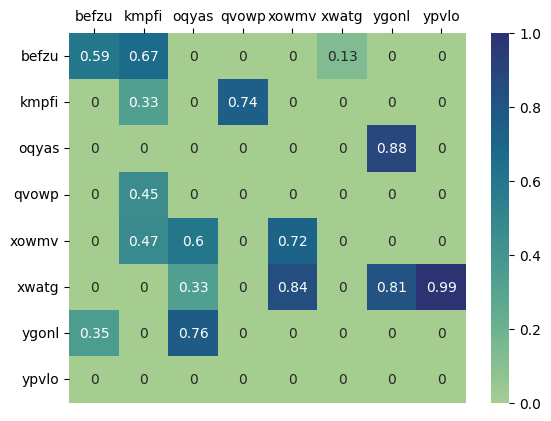

In [683]:
# Visualize a small size graph
g.visualize()

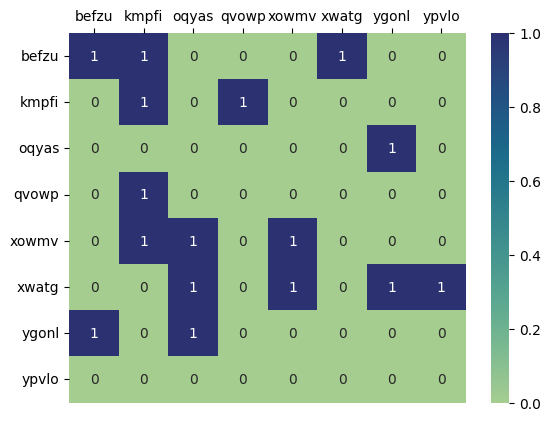

In [684]:
# Visualize the adjacency matrix
g.visualize(matrix="adjacency")

In [685]:
# Create a new undirected graph
f = generateGraph(8, 20, False); f

Graph(Vertices: 8, Edges: 20)
Representation Matrix
_     ajnfu cqwau qumbm ubhcy vkdjf xbiza zajdu zxfwo 
ajnfu 0.74  0     0.19  0     0     0.47  0     0.76  
cqwau 0     0     0     0.86  0.2   0.77  0.19  0.81  
qumbm 0.19  0     0     0     0.11  0     0.48  0     
ubhcy 0     0.86  0     0     0     0.47  0.16  0.91  
vkdjf 0     0.2   0.11  0     0     0.34  0     0.63  
xbiza 0.47  0.77  0     0.47  0.34  0     0     0.33  
zajdu 0     0.19  0.48  0.16  0     0     0.06  0     
zxfwo 0.76  0.81  0     0.91  0.63  0.33  0     0     

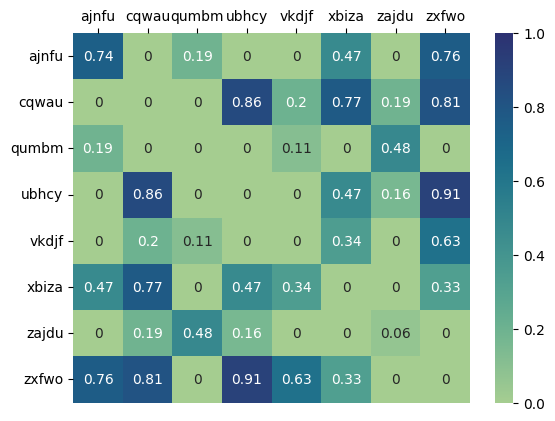

In [686]:
f.visualize()

In [687]:
# Create a large size graph with a relatively small number of edges
vertices = 100
edges_count = 1000
directed = True
big_graph = generateGraph(vertices, edges_count, directed); big_graph

Graph(Vertices: 100, Edges: 998)

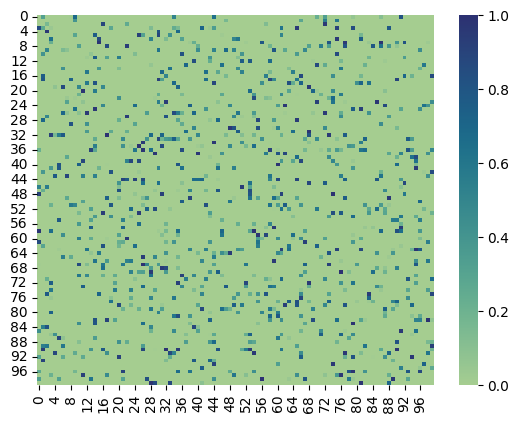

In [688]:
# Visualize a big graph
big_graph.visualize()

In [689]:
# Another graph with more edges
big_graph_with_many_edges = generateGraph(
  size=100,
  amount_edges=10000,
  directed=True)
big_graph_with_many_edges

Graph(Vertices: 100, Edges: 9952)

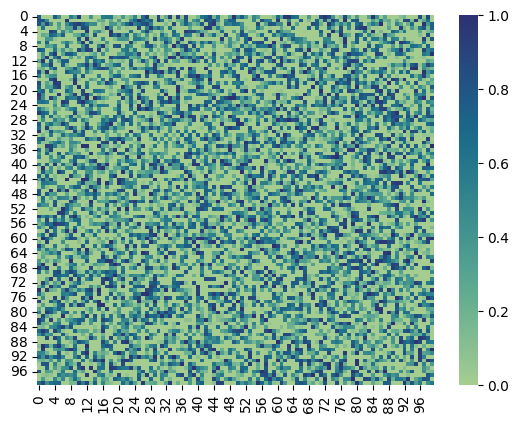

In [697]:
big_graph_with_many_edges.visualize()

In [691]:
g.add_vertex("nahum")
g.add_vertex("rodio")
g

Graph(Vertices: 10, Edges: 20)
Representation Matrix
_     befzu kmpfi oqyas qvowp xowmv xwatg ygonl ypvlo nahum rodio 
befzu 0.59  0.67  0     0     0     0.13  0     0     0     0     
kmpfi 0     0.33  0     0.74  0     0     0     0     0     0     
oqyas 0     0     0     0     0     0     0.88  0     0     0     
qvowp 0     0.45  0     0     0     0     0     0     0     0     
xowmv 0     0.47  0.6   0     0.72  0     0     0     0     0     
xwatg 0     0     0.33  0     0.84  0     0.81  0.99  0     0     
ygonl 0.35  0     0.76  0     0     0     0     0     0     0     
ypvlo 0     0     0     0     0     0     0     0     0     0     
nahum 0     0     0     0     0     0     0     0     0     0     
rodio 0     0     0     0     0     0     0     0     0     0     

In [692]:
vertex_some = g.vertices[3]
g.remove_vertex(vertex_some); g

Graph(Vertices: 9, Edges: 18)
Representation Matrix
_     befzu kmpfi oqyas xowmv xwatg ygonl ypvlo nahum rodio 
befzu 0.59  0.67  0     0     0.13  0     0     0     0     
kmpfi 0     0.33  0     0     0     0     0     0     0     
oqyas 0     0     0     0     0     0.88  0     0     0     
xowmv 0     0.47  0.6   0.72  0     0     0     0     0     
xwatg 0     0     0.79  0.84  0     0.81  0.99  0     0     
ygonl 0.35  0     0.76  0     0     0     0     0     0     
ypvlo 0     0     0     0     0     0     0     0     0     
nahum 0     0     0     0     0     0     0     0     0     
rodio 0     0     0     0     0     0     0     0     0     

In [693]:
g.add_edge(("nahum", "rodio", 0.56)); g

Graph(Vertices: 9, Edges: 19)
Representation Matrix
_     befzu kmpfi nahum oqyas rodio xowmv xwatg ygonl ypvlo 
befzu 0.59  0.67  0     0     0     0     0.13  0     0     
kmpfi 0     0.33  0     0     0     0     0     0     0     
nahum 0     0     0     0     0.56  0     0     0     0     
oqyas 0     0     0     0     0     0     0     0.88  0     
rodio 0     0     0     0     0     0     0     0     0     
xowmv 0     0.47  0     0.6   0     0.72  0     0     0     
xwatg 0     0     0     0.33  0     0.84  0     0.81  0.99  
ygonl 0.35  0     0     0.76  0     0     0     0     0     
ypvlo 0     0     0     0     0     0     0     0     0     

In [694]:
f

Graph(Vertices: 8, Edges: 20)
Representation Matrix
_     ajnfu cqwau qumbm ubhcy vkdjf xbiza zajdu zxfwo 
ajnfu 0.74  0     0.19  0     0     0.47  0     0.76  
cqwau 0     0     0     0.86  0.2   0.77  0.19  0.81  
qumbm 0.19  0     0     0     0.11  0     0.48  0     
ubhcy 0     0.86  0     0     0     0.47  0.16  0.91  
vkdjf 0     0.2   0.11  0     0     0.34  0     0.63  
xbiza 0.47  0.77  0     0.47  0.34  0     0     0.33  
zajdu 0     0.19  0.48  0.16  0     0     0.06  0     
zxfwo 0.76  0.81  0     0.91  0.63  0.33  0     0     

In [695]:
f.add_vertex("nahum")
f.add_vertex("rodio")
f.add_edge(("nahum", "rodio", 0.45))
f

Graph(Vertices: 10, Edges: 21)
Representation Matrix
_     ajnfu cqwau nahum qumbm rodio ubhcy vkdjf xbiza zajdu zxfwo 
ajnfu 0.74  0     0     0.19  0     0     0     0.47  0     0.76  
cqwau 0     0     0     0     0     0.86  0.2   0.77  0.19  0.81  
nahum 0     0     0     0     0.45  0     0     0     0     0     
qumbm 0.19  0     0     0     0     0     0.11  0     0.48  0     
rodio 0     0     0.45  0     0     0     0     0     0     0     
ubhcy 0     0.86  0     0     0     0     0     0.47  0.16  0.91  
vkdjf 0     0.2   0     0.11  0     0     0     0.34  0     0.63  
xbiza 0.47  0.77  0     0     0     0.47  0.34  0     0     0.33  
zajdu 0     0.19  0     0.48  0     0.16  0     0     0.06  0     
zxfwo 0.76  0.81  0     0     0     0.91  0.63  0.33  0     0     